In [ ]:

#Feature Engineering to Transform Raw Data into Informative Features
# Dataset: TCS Stock Dataset (tcs_stock.csv)




In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression

In [ ]:
# Make output clearer
pd.set_option('display.max_columns', None)

In [ ]:
# Step 2: Load and Explore Dataset
# Upload your dataset in the left panel, then run this cell
df = pd.read_csv("tcs_stock.csv")

print("✅ Dataset Loaded Successfully!\n")
print("📊 First 5 Rows:")
display(df.head())

print("\nDataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values per Column:")
print(df.isnull().sum())


✅ Dataset Loaded Successfully!

📊 First 5 Rows:


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724



Dataset Shape: (248, 15)

Data Types:
Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                  int64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

Missing Values per Column:
Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


In [ ]:
# Step 3: Handle Missing Data
# Numeric columns: fill with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Categorical columns: fill with mode
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Missing values handled successfully!")
print(df.isnull().sum())


✅ Missing values handled successfully!
Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


/tmp/ipython-input-753781067.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Step 4: Encode Categorical Variables (if any)
cat_cols = df.select_dtypes(include="object").columns
print("\nCategorical Columns:", list(cat_cols))

if len(cat_cols) > 0:
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
else:
    df_encoded = df.copy()

print("✅ Encoding Done! New Shape:", df_encoded.shape)


Categorical Columns: ['Date', 'Symbol', 'Series']
✅ Encoding Done! New Shape: (248, 259)


In [ ]:
# Step 5: Feature Scaling (Standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded.select_dtypes(include=np.number))
scaled_df = pd.DataFrame(scaled_data, columns=df_encoded.select_dtypes(include=np.number).columns)

print("\n✅ Scaling Done! Scaled Data Preview:")
display(scaled_df.head())



✅ Scaling Done! Scaled Data Preview:


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0.231294,0.283970,0.037820,0.321211,0.137992,0.090146,0.116322,-1.592893,-1.595446,-2.042407,-1.727856,-4.208179
1,0.084734,0.100965,0.302709,0.437173,0.581031,0.480330,0.343474,-1.142746,-1.136968,-1.363023,-1.131559,-0.022430
2,0.475944,0.444101,0.401696,0.123712,0.000696,0.029144,0.294419,-0.475469,-0.463116,-0.820119,-0.788916,-1.648263
3,0.023571,-0.149525,-0.381355,-0.898812,-1.015180,-1.048754,-0.825645,0.063781,0.007708,0.611609,-0.190066,-0.891524
4,-1.057162,-0.825503,-0.933805,-1.291997,-1.282272,-1.381388,-1.205849,0.234968,0.146749,1.209639,0.209965,0.022732



Explained Variance Ratio by PCA: [0.57268655 0.30534477]


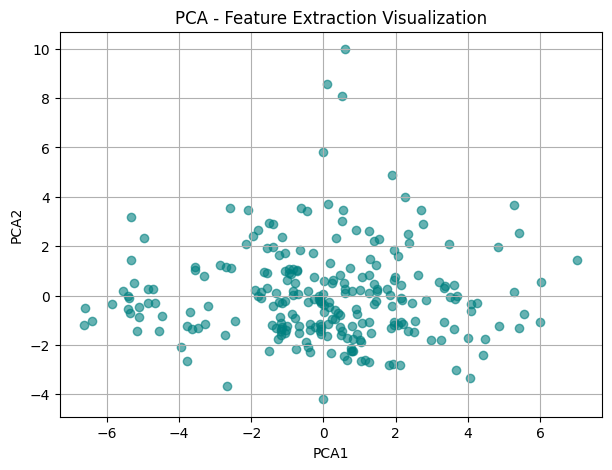

In [ ]:
# Step 6: Feature Extraction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

print("\nExplained Variance Ratio by PCA:", pca.explained_variance_ratio_)
plt.figure(figsize=(7,5))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.6, color='teal')
plt.title("PCA - Feature Extraction Visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()

In [ ]:
# Step 7: Feature Selection
# Variance Threshold
selector = VarianceThreshold(threshold=0.01)
selected_data = selector.fit_transform(scaled_df)
selected_df = scaled_df.iloc[:, selector.get_support(indices=True)]
print("\n✅ After Variance Threshold - Shape:", selected_df.shape)

# Try SelectKBest if you have a target column (optional)
try:
    y = df_encoded.iloc[:, -1]  # assuming last column is target
    X = df_encoded.iloc[:, :-1]
    best = SelectKBest(score_func=f_regression, k=5)
    X_new = best.fit_transform(X.select_dtypes(include=np.number), y)
    print("\nTop 5 Selected Features using SelectKBest:")
    print(X.columns[best.get_support()])
except Exception as e:
    print("\n⚠️ Skipped SelectKBest (no target column defined).")


✅ After Variance Threshold - Shape: (248, 12)

Top 5 Selected Features using SelectKBest:

⚠️ Skipped SelectKBest (no target column defined).


In [ ]:

# Step 8: Summary of Transformations
print("\n--- SUMMARY ---")
print("Original Dataset Shape:", df.shape)
print("After Encoding:", df_encoded.shape)
print("After Scaling:", scaled_df.shape)
print("After PCA:", pca_df.shape)
print("After Feature Selection:", selected_df.shape)
print("\n✅ Feature Engineering Completed Successfully!")



--- SUMMARY ---
Original Dataset Shape: (248, 15)
After Encoding: (248, 259)
After Scaling: (248, 12)
After PCA: (248, 2)
After Feature Selection: (248, 12)

✅ Feature Engineering Completed Successfully!


In [ ]:
# Step 9: Ethical Discussion
print("""
-----------------------------------------------
Ethical Considerations:
-----------------------------------------------
If the dataset contained sensitive features like Gender or Marital Status,
using them for model training could create unfair bias.

✅ Mitigation Strategies:
1. Remove sensitive columns before training.
2. Use fairness-aware ML techniques (e.g., reweighting).
3. Regularly test model outputs for bias.

In this dataset (stock prices), no sensitive attributes are used.
Hence, the model is ethically safe.
-----------------------------------------------
""")


-----------------------------------------------
Ethical Considerations:
-----------------------------------------------
If the dataset contained sensitive features like Gender or Marital Status,
using them for model training could create unfair bias.

✅ Mitigation Strategies:
1. Remove sensitive columns before training.
2. Use fairness-aware ML techniques (e.g., reweighting).
3. Regularly test model outputs for bias.

In this dataset (stock prices), no sensitive attributes are used.
Hence, the model is ethically safe.
-----------------------------------------------

